In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from ML2_lib import models
from ML2_lib import SGDByTorch
import torch.nn.functional as F
import torch
from sklearn.preprocessing import LabelBinarizer
from ML2_lib import format_data

In [12]:
name_path = "data/adult/adult_classification.names"
train_path = "data/adult/adult_classification.csv"
test_path = "data/adult/adult_classification.test"
hoge = format_data.Format(train_path=train_path,name_path=name_path,test_path=test_path)

In [13]:
X_train, y_train, X_test, y_test = hoge.data_return()

In [14]:
w_dim = X_train.shape[1]
class_num = int(max(y_train) + 1)
unit_num = 3
model = models.FF_L1(w_num=w_dim,c_num=class_num,unit_num=unit_num)
model.parameter_init()

In [15]:
hoge = SGDByTorch.SGDTorchCheck(lr=0.001)

In [16]:
sgd_model, loss_stack, test_loss_stack,accuracy_stack = hoge.learn(x=X_train, y=y_train, model=model,class_num=class_num,X_test=X_test,Y_test=y_test)

step : 0
OrderedDict([('fc1.weight', tensor([[-4.8078, -1.6792,  2.4937, -3.2598, -3.0604,  4.1096,  2.3836,  2.1304,
          3.6929, -3.9543, -2.0841, -2.5153,  4.4997, -1.6595,  0.9357, -0.3736,
          3.7437, -2.9544, -3.3773,  0.2689, -1.4086, -3.3300,  4.9459, -4.7989,
          2.8488, -1.8427,  0.2930,  2.6649,  2.0100, -4.4815, -3.7244,  2.5313,
          3.0074, -1.5526, -2.9805,  0.4755, -4.3595,  1.0036, -1.6910, -2.6179,
         -0.4078,  4.8491, -0.4655, -1.4968, -0.2680,  0.7112, -2.2656, -1.0763,
         -2.3708, -1.2081,  3.8591,  3.6657, -1.4626,  4.0611, -2.9869, -4.8180,
         -0.7989,  4.7597,  0.4161,  3.4598, -2.4248, -1.2179, -1.8563,  2.6349,
          2.4566, -0.6418, -3.8300,  3.2236,  4.4094, -1.0305,  4.3939,  2.5363,
          2.7898, -2.9250, -3.2847, -1.9174,  3.1557,  2.6810,  0.6469,  1.4864,
         -2.5366, -1.5552, -0.7450, -4.3142,  3.7220,  2.9184,  3.1247,  2.7051,
         -4.0018, -1.2595,  2.8166,  2.6927, -3.4882,  4.6850,  0.5103, 

/Users/naoki/.pyenv/versions/ML2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/naoki/.pyenv/versions/ML2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/naoki/.pyenv/versions/ML2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


step : 8000
OrderedDict([('fc1.weight', tensor([[-4.8199, -1.7020,  2.4208, -3.2558, -3.0535,  4.0603,  2.3844,  2.1102,
          3.5294, -3.9478, -2.0748, -2.5153,  4.4997, -1.6587,  0.9129, -0.3767,
          3.7414, -2.9551, -3.3797,  0.2616, -1.4035, -3.3180,  4.9153, -4.7935,
          2.7146, -1.8216,  0.2929,  2.6811,  1.9857, -4.4954, -3.7244,  2.5879,
          2.9915, -1.7239, -2.9921,  0.4643, -4.3521,  1.0019, -1.6969, -2.5664,
         -0.4127,  4.7841, -0.4787, -1.5662, -0.2703,  0.7046, -2.2631, -1.1150,
         -2.3739, -1.2257,  3.9049,  3.5889, -1.4647,  3.9386, -3.0073, -4.8093,
         -0.8033,  4.7521,  0.3331,  3.4537, -2.4907, -1.3372, -1.9040,  2.6349,
          2.4592, -0.6423, -3.8301,  3.2175,  4.4074, -1.0305,  4.3918,  2.5342,
          2.7898, -2.9276, -3.2847, -1.9182,  3.1528,  2.6810,  0.6493,  1.4863,
         -2.5366, -1.5560, -0.7465, -4.3142,  3.7220,  2.9150,  3.1238,  2.7051,
         -4.0070, -1.2595,  2.8166,  2.6927, -3.4882,  4.6803,  0.511

/Users/naoki/.pyenv/versions/ML2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/naoki/.pyenv/versions/ML2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/naoki/.pyenv/versions/ML2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


step : 9000
OrderedDict([('fc1.weight', tensor([[-4.8199, -1.7021,  2.4204, -3.2557, -3.0535,  4.0600,  2.3844,  2.1102,
          3.5283, -3.9478, -2.0746, -2.5153,  4.4997, -1.6587,  0.9129, -0.3768,
          3.7414, -2.9551, -3.3797,  0.2616, -1.4035, -3.3180,  4.9153, -4.7935,
          2.7143, -1.8217,  0.2929,  2.6812,  1.9855, -4.4954, -3.7244,  2.5882,
          2.9915, -1.7250, -2.9921,  0.4643, -4.3522,  1.0019, -1.6970, -2.5664,
         -0.4127,  4.7838, -0.4789, -1.5663, -0.2703,  0.7044, -2.2631, -1.1148,
         -2.3739, -1.2258,  3.9052,  3.5882, -1.4647,  3.9382, -3.0073, -4.8092,
         -0.8033,  4.7520,  0.3330,  3.4537, -2.4914, -1.3377, -1.9045,  2.6349,
          2.4592, -0.6423, -3.8301,  3.2175,  4.4074, -1.0305,  4.3918,  2.5341,
          2.7898, -2.9276, -3.2847, -1.9182,  3.1528,  2.6810,  0.6493,  1.4863,
         -2.5366, -1.5560, -0.7465, -4.3142,  3.7219,  2.9150,  3.1239,  2.7051,
         -4.0071, -1.2595,  2.8166,  2.6927, -3.4882,  4.6803,  0.511

/Users/naoki/.pyenv/versions/ML2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/naoki/.pyenv/versions/ML2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/naoki/.pyenv/versions/ML2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


step : 14000
OrderedDict([('fc1.weight', tensor([[-4.8193, -1.7029,  2.4181, -3.2553, -3.0530,  4.0584,  2.3848,  2.1103,
          3.5216, -3.9475, -2.0751, -2.5147,  4.4997, -1.6589,  0.9120, -0.3770,
          3.7414, -2.9553, -3.3798,  0.2612, -1.4036, -3.3181,  4.9157, -4.7935,
          2.7108, -1.8203,  0.2929,  2.6816,  1.9829, -4.4956, -3.7244,  2.5924,
          2.9911, -1.7336, -2.9925,  0.4638, -4.3535,  1.0019, -1.6979, -2.5638,
         -0.4132,  4.7825, -0.4803, -1.5686, -0.2705,  0.7053, -2.2629, -1.1160,
         -2.3740, -1.2264,  3.9090,  3.5827, -1.4650,  3.9342, -3.0076, -4.8089,
         -0.8035,  4.7512,  0.3316,  3.4535, -2.4947, -1.3418, -1.9063,  2.6348,
          2.4591, -0.6424, -3.8301,  3.2174,  4.4073, -1.0304,  4.3917,  2.5341,
          2.7898, -2.9276, -3.2847, -1.9183,  3.1527,  2.6810,  0.6493,  1.4863,
         -2.5366, -1.5560, -0.7464, -4.3142,  3.7219,  2.9149,  3.1238,  2.7051,
         -4.0072, -1.2596,  2.8166,  2.6927, -3.4885,  4.6802,  0.51

/Users/naoki/.pyenv/versions/ML2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/naoki/.pyenv/versions/ML2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/naoki/.pyenv/versions/ML2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


step : 15000
OrderedDict([('fc1.weight', tensor([[-4.8191, -1.7030,  2.4178, -3.2552, -3.0529,  4.0581,  2.3848,  2.1105,
          3.5198, -3.9473, -2.0753, -2.5147,  4.4996, -1.6590,  0.9118, -0.3771,
          3.7413, -2.9553, -3.3799,  0.2612, -1.4035, -3.3182,  4.9164, -4.7934,
          2.7090, -1.8199,  0.2929,  2.6818,  1.9822, -4.4958, -3.7244,  2.5936,
          2.9909, -1.7358, -2.9925,  0.4637, -4.3538,  1.0019, -1.6983, -2.5632,
         -0.4136,  4.7821, -0.4810, -1.5691, -0.2705,  0.7060, -2.2630, -1.1160,
         -2.3739, -1.2264,  3.9100,  3.5811, -1.4651,  3.9331, -3.0077, -4.8087,
         -0.8036,  4.7511,  0.3311,  3.4534, -2.4955, -1.3427, -1.9070,  2.6348,
          2.4591, -0.6423, -3.8301,  3.2174,  4.4072, -1.0304,  4.3917,  2.5342,
          2.7898, -2.9276, -3.2847, -1.9183,  3.1526,  2.6810,  0.6493,  1.4864,
         -2.5366, -1.5560, -0.7465, -4.3142,  3.7219,  2.9148,  3.1238,  2.7051,
         -4.0073, -1.2596,  2.8166,  2.6927, -3.4886,  4.6802,  0.51

/Users/naoki/.pyenv/versions/ML2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/naoki/.pyenv/versions/ML2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/naoki/.pyenv/versions/ML2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


step : 18000
OrderedDict([('fc1.weight', tensor([[-4.8181, -1.7035,  2.4168, -3.2548, -3.0526,  4.0570,  2.3854,  2.1106,
          3.5136, -3.9467, -2.0747, -2.5147,  4.4996, -1.6593,  0.9112, -0.3771,
          3.7412, -2.9552, -3.3800,  0.2608, -1.4033, -3.3182,  4.9182, -4.7932,
          2.7054, -1.8192,  0.2928,  2.6827,  1.9792, -4.4962, -3.7244,  2.5981,
          2.9907, -1.7435, -2.9928,  0.4635, -4.3547,  1.0019, -1.6987, -2.5620,
         -0.4141,  4.7806, -0.4825, -1.5706, -0.2707,  0.7071, -2.2630, -1.1162,
         -2.3739, -1.2265,  3.9141,  3.5763, -1.4653,  3.9295, -3.0079, -4.8081,
         -0.8036,  4.7510,  0.3300,  3.4532, -2.4984, -1.3456, -1.9083,  2.6348,
          2.4591, -0.6423, -3.8302,  3.2174,  4.4071, -1.0304,  4.3915,  2.5342,
          2.7898, -2.9276, -3.2847, -1.9183,  3.1526,  2.6810,  0.6493,  1.4863,
         -2.5367, -1.5559, -0.7464, -4.3142,  3.7220,  2.9148,  3.1238,  2.7051,
         -4.0075, -1.2596,  2.8166,  2.6927, -3.4886,  4.6803,  0.51

/Users/naoki/.pyenv/versions/ML2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/naoki/.pyenv/versions/ML2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/naoki/.pyenv/versions/ML2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


step : 22000
OrderedDict([('fc1.weight', tensor([[-4.8162, -1.7042,  2.4166, -3.2542, -3.0521,  4.0566,  2.3866,  2.1114,
          3.5047, -3.9455, -2.0743, -2.5141,  4.4996, -1.6597,  0.9100, -0.3775,
          3.7412, -2.9553, -3.3803,  0.2604, -1.4028, -3.3182,  4.9212, -4.7929,
          2.7005, -1.8177,  0.2928,  2.6838,  1.9759, -4.4968, -3.7244,  2.6061,
          2.9902, -1.7545, -2.9930,  0.4632, -4.3555,  1.0019, -1.7000, -2.5597,
         -0.4145,  4.7784, -0.4850, -1.5728, -0.2707,  0.7098, -2.2627, -1.1163,
         -2.3736, -1.2271,  3.9213,  3.5695, -1.4659,  3.9243, -3.0082, -4.8073,
         -0.8037,  4.7503,  0.3288,  3.4528, -2.5008, -1.3503, -1.9083,  2.6348,
          2.4591, -0.6424, -3.8302,  3.2174,  4.4070, -1.0304,  4.3915,  2.5343,
          2.7899, -2.9276, -3.2847, -1.9184,  3.1526,  2.6810,  0.6493,  1.4864,
         -2.5367, -1.5560, -0.7465, -4.3141,  3.7218,  2.9148,  3.1240,  2.7051,
         -4.0080, -1.2596,  2.8166,  2.6927, -3.4886,  4.6802,  0.51

/Users/naoki/.pyenv/versions/ML2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/naoki/.pyenv/versions/ML2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/naoki/.pyenv/versions/ML2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


step : 25000
OrderedDict([('fc1.weight', tensor([[-4.8158, -1.7047,  2.4158, -3.2540, -3.0518,  4.0559,  2.3869,  2.1116,
          3.4996, -3.9450, -2.0741, -2.5136,  4.4996, -1.6599,  0.9094, -0.3777,
          3.7411, -2.9553, -3.3804,  0.2601, -1.4028, -3.3183,  4.9223, -4.7928,
          2.6976, -1.8170,  0.2927,  2.6842,  1.9747, -4.4969, -3.7244,  2.6084,
          2.9899, -1.7596, -2.9932,  0.4630, -4.3560,  1.0019, -1.7007, -2.5593,
         -0.4151,  4.7771, -0.4861, -1.5738, -0.2708,  0.7107, -2.2626, -1.1157,
         -2.3737, -1.2272,  3.9235,  3.5662, -1.4660,  3.9220, -3.0083, -4.8071,
         -0.8037,  4.7501,  0.3281,  3.4526, -2.5031, -1.3525, -1.9096,  2.6348,
          2.4591, -0.6424, -3.8302,  3.2174,  4.4070, -1.0304,  4.3914,  2.5343,
          2.7899, -2.9276, -3.2847, -1.9185,  3.1526,  2.6810,  0.6493,  1.4863,
         -2.5367, -1.5560, -0.7465, -4.3141,  3.7218,  2.9147,  3.1240,  2.7050,
         -4.0081, -1.2597,  2.8166,  2.6926, -3.4886,  4.6801,  0.51

/Users/naoki/.pyenv/versions/ML2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/naoki/.pyenv/versions/ML2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/naoki/.pyenv/versions/ML2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


step : 27000
OrderedDict([('fc1.weight', tensor([[-4.8156, -1.7050,  2.4155, -3.2538, -3.0517,  4.0553,  2.3871,  2.1121,
          3.4966, -3.9448, -2.0743, -2.5136,  4.4996, -1.6601,  0.9089, -0.3777,
          3.7410, -2.9555, -3.3805,  0.2598, -1.4026, -3.3184,  4.9233, -4.7926,
          2.6956, -1.8160,  0.2927,  2.6844,  1.9733, -4.4971, -3.7244,  2.6106,
          2.9898, -1.7636, -2.9933,  0.4629, -4.3563,  1.0019, -1.7015, -2.5580,
         -0.4155,  4.7763, -0.4868, -1.5747, -0.2708,  0.7115, -2.2625, -1.1159,
         -2.3737, -1.2275,  3.9254,  3.5637, -1.4662,  3.9202, -3.0083, -4.8067,
         -0.8039,  4.7500,  0.3277,  3.4525, -2.5047, -1.3538, -1.9107,  2.6349,
          2.4590, -0.6424, -3.8303,  3.2174,  4.4069, -1.0304,  4.3913,  2.5343,
          2.7899, -2.9276, -3.2847, -1.9185,  3.1526,  2.6810,  0.6493,  1.4863,
         -2.5367, -1.5560, -0.7465, -4.3142,  3.7218,  2.9148,  3.1240,  2.7050,
         -4.0083, -1.2597,  2.8166,  2.6926, -3.4886,  4.6801,  0.51

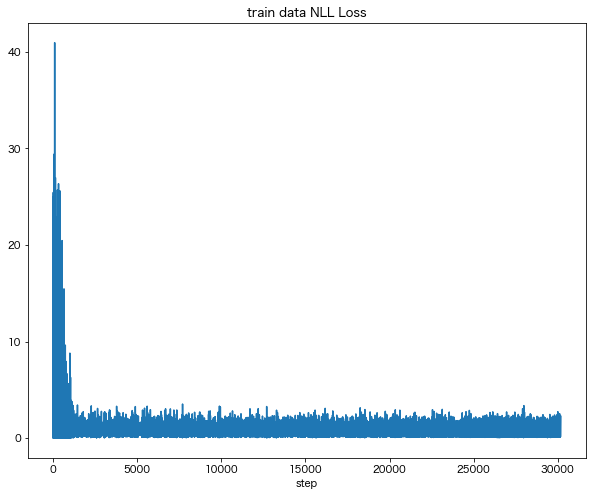

In [17]:


fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

ax1.set_title("train data NLL Loss")

ax1.plot(loss_stack)
ax1.set_xlabel("step")
plt.show()

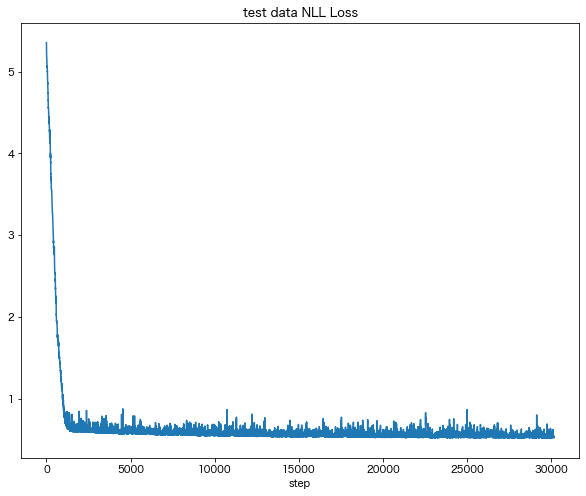

In [18]:
fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)
ax1.set_title("test data NLL Loss")

ax1.plot(test_loss_stack)
ax1.set_xlabel("step")
plt.show()

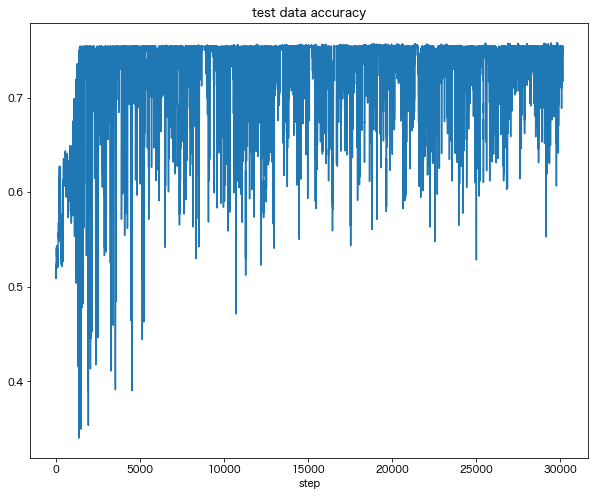

In [19]:
fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)
ax1.set_title("test data accuracy")

ax1.plot(accuracy_stack)
ax1.set_xlabel("step")
plt.show()

In [20]:

accuracy_stack

[0.5167330677290837,
 0.5167330677290837,
 0.5186586985391767,
 0.5219787516600266,
 0.5228419654714476,
 0.5228419654714476,
 0.5237051792828685,
 0.5215803452855245,
 0.5199867197875166,
 0.5169986719787517,
 0.5166666666666667,
 0.5166666666666667,
 0.5195883134130146,
 0.5195883134130146,
 0.5197875166002656,
 0.5197875166002656,
 0.5197875166002656,
 0.5197875166002656,
 0.5192563081009296,
 0.5087649402390438,
 0.5162018592297477,
 0.5168658698539177,
 0.5168658698539177,
 0.5186586985391767,
 0.5186586985391767,
 0.5201859229747676,
 0.5201859229747676,
 0.5250332005312085,
 0.5250332005312085,
 0.5274900398406375,
 0.5274900398406375,
 0.5274900398406375,
 0.5307436918990703,
 0.5307436918990703,
 0.5307436918990703,
 0.5307436918990703,
 0.5307436918990703,
 0.5307436918990703,
 0.5307436918990703,
 0.5353253652058433,
 0.5395750332005312,
 0.5410358565737052,
 0.5410358565737052,
 0.5410358565737052,
 0.5410358565737052,
 0.5410358565737052,
 0.5410358565737052,
 0.5414342629